In [1]:
from client import start_client
import matplotlib.pyplot as plt
import numpy as np

client,w=start_client(5)
client

<Client: 'tcp://127.0.0.1:45033' processes=5 threads=5, memory=33.69 GB>


Client Scheduler: tcp://127.0.0.1:45033 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 5 Cores: 5 Memory: 33.69 GB


In [2]:
from main_func import main
#feed client,workers,num of samples,num of features,parts and e
E_array,feature_array,Acc,Rounds,Subs=main(client,w,1200,4,100,0.1)

coo ([array([ 1.76245541, 22.32357104, 26.79321926, 27.2893469 ]), -19.842052381246134], 1, [1])
Accuracy: 89.666667
coo ([array([ 3.21230689, 16.48382531, 17.88831726, 19.04348791]), 9.04138652270884], 1, [3])
Accuracy: 89.000000
coo ([array([32.1592446 , 29.48631486,  5.7927472 , 18.76253461]), 8.96099113688957], 1, [2])
Accuracy: 66.666667
coo ([array([19.26782427, 22.01136174,  9.02595322, 16.75160217]), 8.91703184670902], 1, [1])
Accuracy: 70.333333
coo ([array([28.82656489, 27.59110302,  6.67616424, 18.28985544]), 8.925243969115632], 2, [2, 2])
Accuracy: 67.000000
coo ([array([ 4.53438054, 19.51614695, 20.45359328, 22.12308606]), -0.05948199674240762], 1, [1])
Accuracy: 88.000000
coo ([array([22.646772  , 31.20638662, 17.42982382, 26.45499392]), -8.229416637265283], 6, [2, 2, 2, 2, 2, 2])
Accuracy: 76.333333
coo ([array([ 5.0279549 , 23.81092282, 25.45498517, 27.28370491]), -8.26047107517737], 9, [5, 2, 2, 2, 4, 1, 1, 1, 1])
Accuracy: 89.000000
coo ([array([ 3.17723345, 27.122284

Coef: [-18.94507482  12.31420722  34.54086385  26.59260567]
Accuracy: 89.333333
Coef: [ 1.76245541 22.32357104 26.79321926 27.2893469 ]
Accuracy: 89.666667
Coef: [ 1.74699527 22.12775024 26.55819102 27.04996666]
Accuracy: 89.666667
Coef: [-5.8608492  19.14223817 30.28924071 27.67141818]
Accuracy: 93.000000
Coef: [-4.41099772 13.30249244 21.38433871 19.42555919]
Accuracy: 90.000000
Coef: [-13.99098134   6.41230983  22.07973629  16.23773024]
Accuracy: 88.333333
Coef: [14.95595638 19.41479938  9.98416624 15.95677693]
Accuracy: 74.666667
Coef: [ 2.06453604 11.93984626 13.21737226 13.9458445 ]
Accuracy: 89.666667
Coef: [2.50789349 8.41799764 8.27462398 9.22262571]
Accuracy: 86.000000
Coef: [-1.19350984  7.6150396  10.92037669 10.34874864]
Accuracy: 81.333333
Coef: [-1.18372697  7.55262124 10.83086541 10.26392284]
Accuracy: 81.333333
Coef: [ 8.37501366 13.13236252  8.48107643 11.8021761 ]
Accuracy: 74.333333
Coef: [-15.9171707    5.05740646  22.25850547  15.63540673]
Accuracy: 86.000000
Coef

ValueError: x and y must have same first dimension, but have shapes (11,) and (100,)

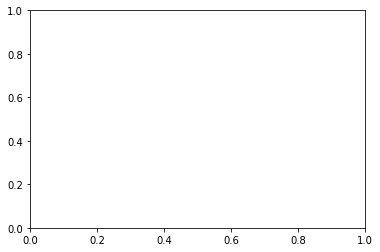

In [3]:
from main_func import real_partial
E2,Acc2=real_partial(100)
plt.plot([i for i in range(len(Acc))],Acc2)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Rounds,Acc)
Rounds
# plt.legend([i for i in range(len(Acc))], loc='upper left')
